In [14]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

scenario_params = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2   and times 95% because 95% population coverage     
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on" # this is a string and either (1) on or (2) off for details see the scenario_class.py file      
            }


scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
print(scenario_1.compute_average_global_growth_rate())
scenario_1.run()

scenario_params2 =  {"end_year": 2100,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2       
                    "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on 
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on" # this is a string and either (1) on or (2) off for details see the scenario_class.py file
            }

scenario_2 = Scenario(scenario_params2)
scenario_2.compute_country_scenario_params()
print(scenario_2.compute_average_global_growth_rate())
scenario_2.run()

0.010579586185077927
0.00514024971590521


### Plot global quantities as a first check

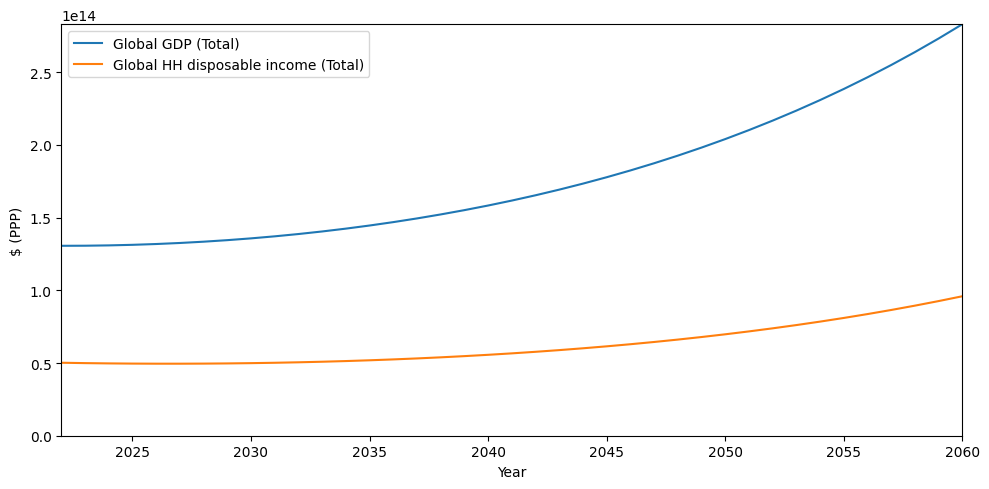

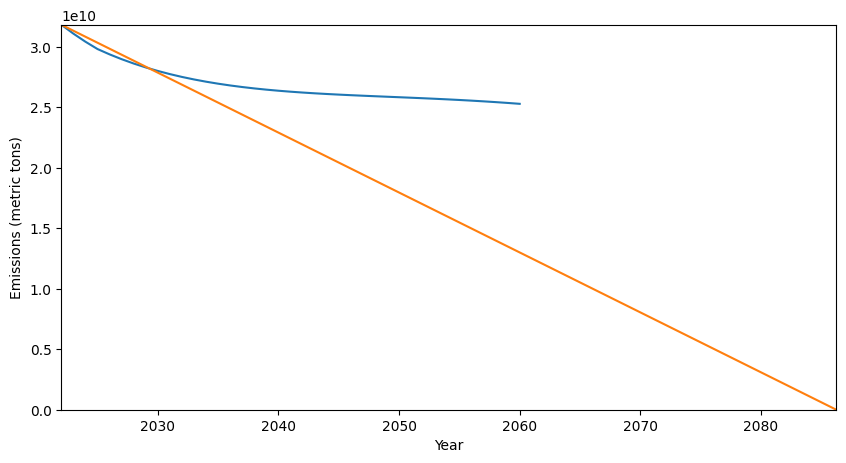

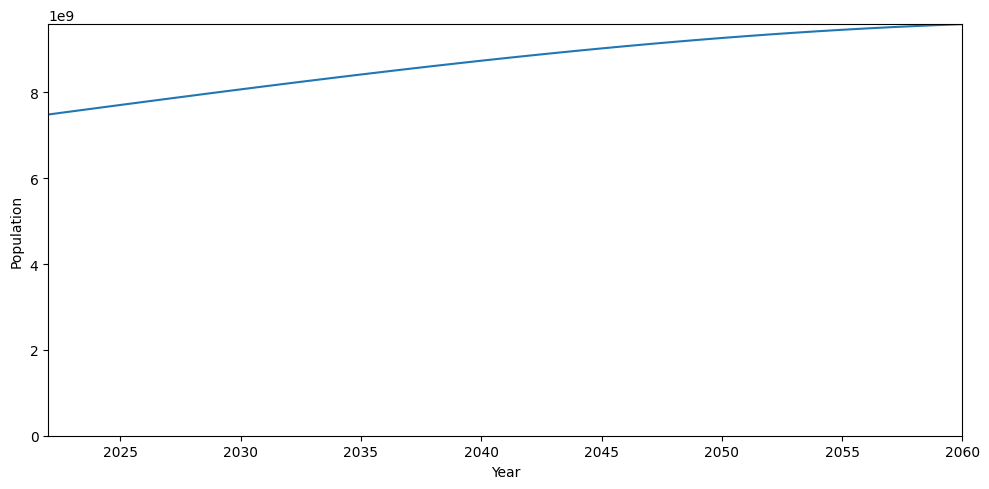

C:\Users\yoswald\AppData\Local\Temp\ipykernel_24736\3414372215.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  emission_trajectories[country.code] = country.emissions_trajectory
C:\Users\yoswald\AppData\Local\Temp\ipykernel_24736\3414372215.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  emission_trajectories[country.code] = country.emissions_trajectory
C:\Users\yoswald\AppData\Local\Temp\ipykernel_24736\3414372215.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

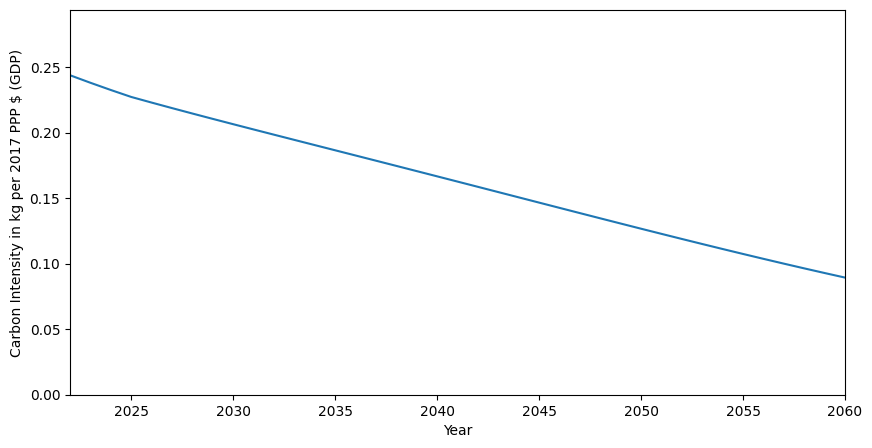

In [15]:
plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()
plotting_1.plot_global_population()
plotting_1.plot_global_carbon_intensity()


# store all the emission trajectories in a dataframe
emission_trajectories = pd.DataFrame()
for country in scenario_1.countries.values():
    emission_trajectories[country.code] = country.emissions_trajectory

### Compute with steady state



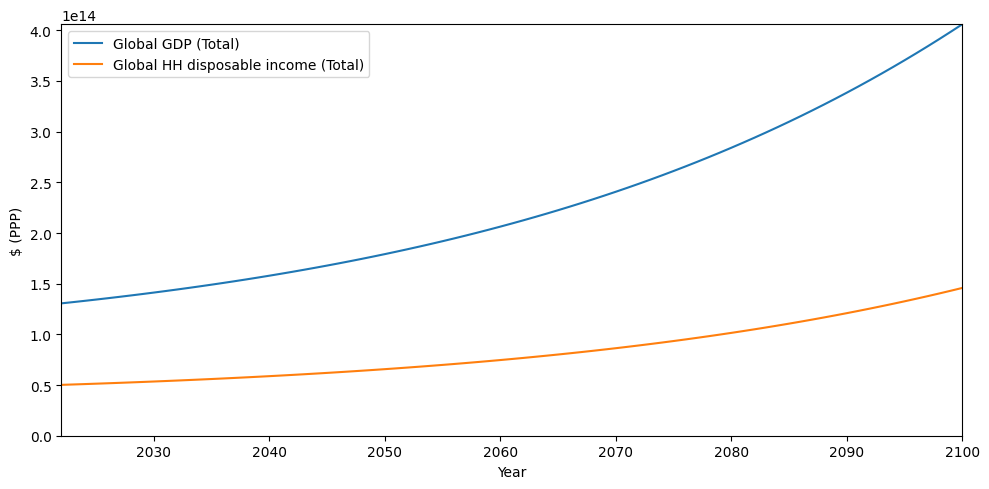

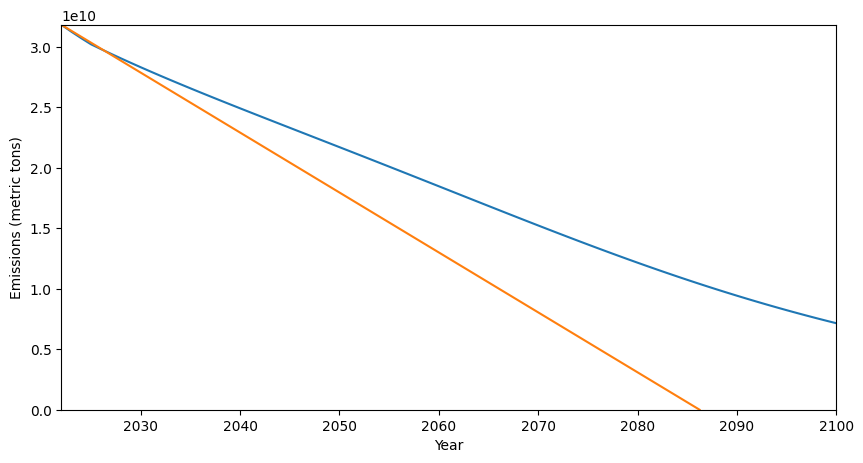

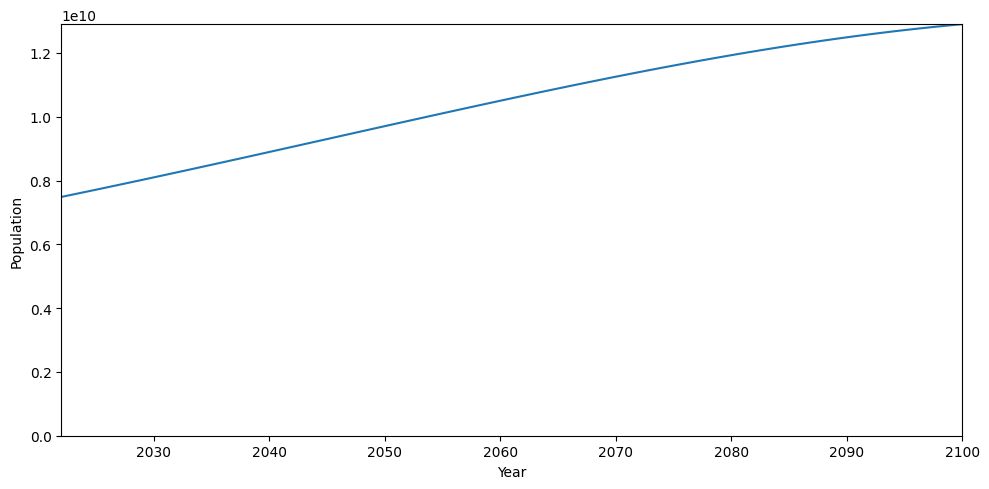

[0.24376695543770557,
 0.2372118756932655,
 0.23092461918689433,
 0.22489768732690277,
 0.21981844583362706,
 0.2148442558470659,
 0.20997024305808967,
 0.20519177514977688,
 0.20050445976188533,
 0.19590414258233563,
 0.19138690550870563,
 0.18694906482027343,
 0.18258716929910804,
 0.17829799823724224,
 0.17407855926613047,
 0.16992608594451844,
 0.16583803504160782,
 0.16181208345407908,
 0.15784612469821208,
 0.15393826492204957,
 0.15008681838735793,
 0.14629030237702867,
 0.14254743149052945,
 0.13885711129802625,
 0.13521843133277153,
 0.13163065741117058,
 0.12809322328050213,
 0.12460572160536083,
 0.12116789431536454,
 0.11777962234826764,
 0.11444091483413277,
 0.11115189777737804,
 0.10791280230406976,
 0.10472395255153617,
 0.10158575328596808,
 0.09849867734095044,
 0.095463252975603,
 0.09248005125507001,
 0.08954967355833215,
 0.0866727393186658,
 0.08384987410050522,
 0.08108169811300149,
 0.07836881525528491,
 0.07571180278146504,
 0.07311120166488978,
 0.070567507731

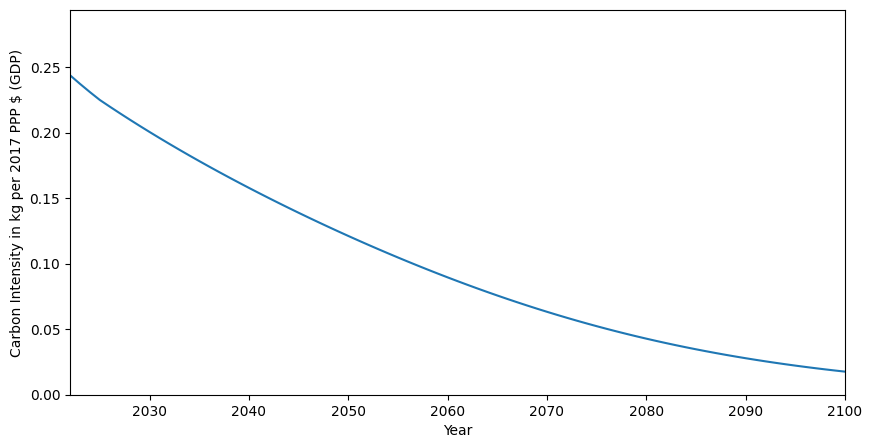

In [16]:
plotting_2 = Plots(scenario_2) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_2.plot_global_economy()
plotting_2.plot_global_emissions()
plotting_2.plot_global_population()
plotting_2.plot_global_carbon_intensity()

#### Compute global gdp per capita average

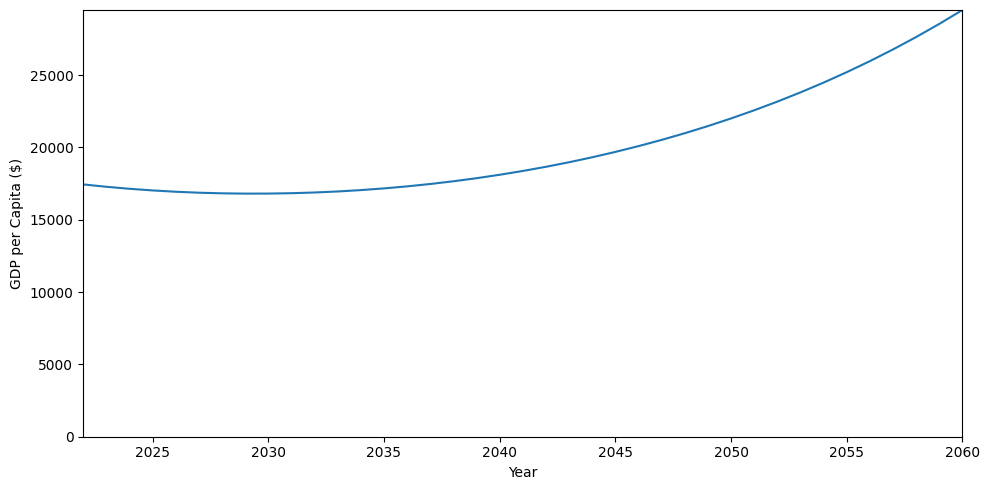

In [17]:
# Compute global gdp per capita average by dividing the global gdp by the global population for 2100 in the gdp trajectory and the pop trajectory
plotting_1.plot_global_gdp_per_capita()

### Plot example country, here the United States

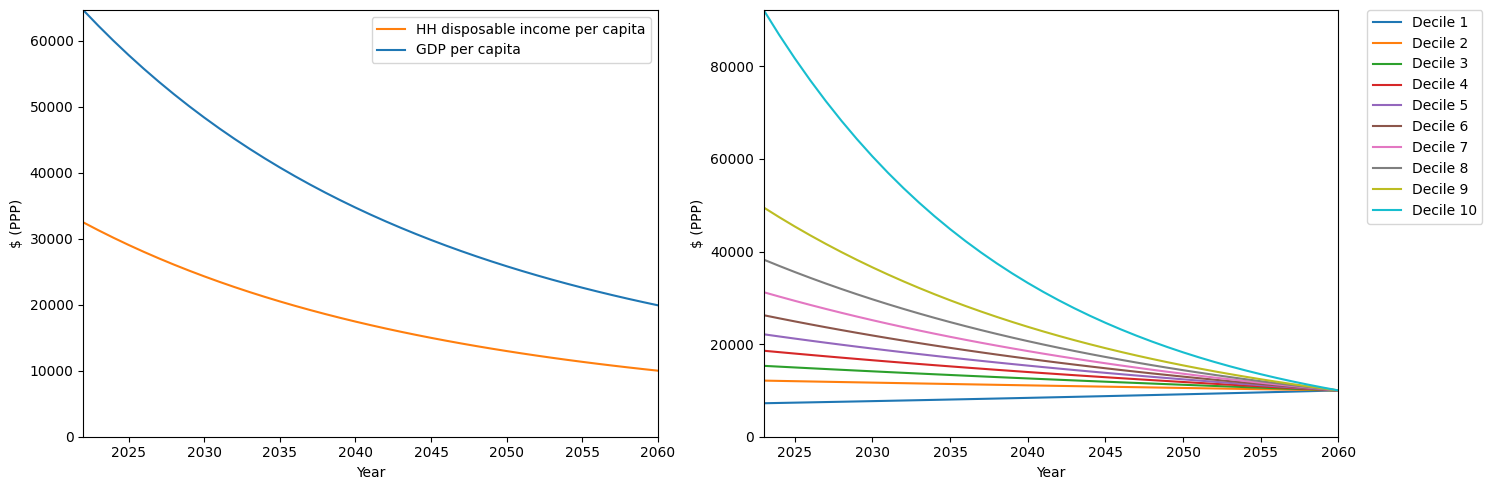

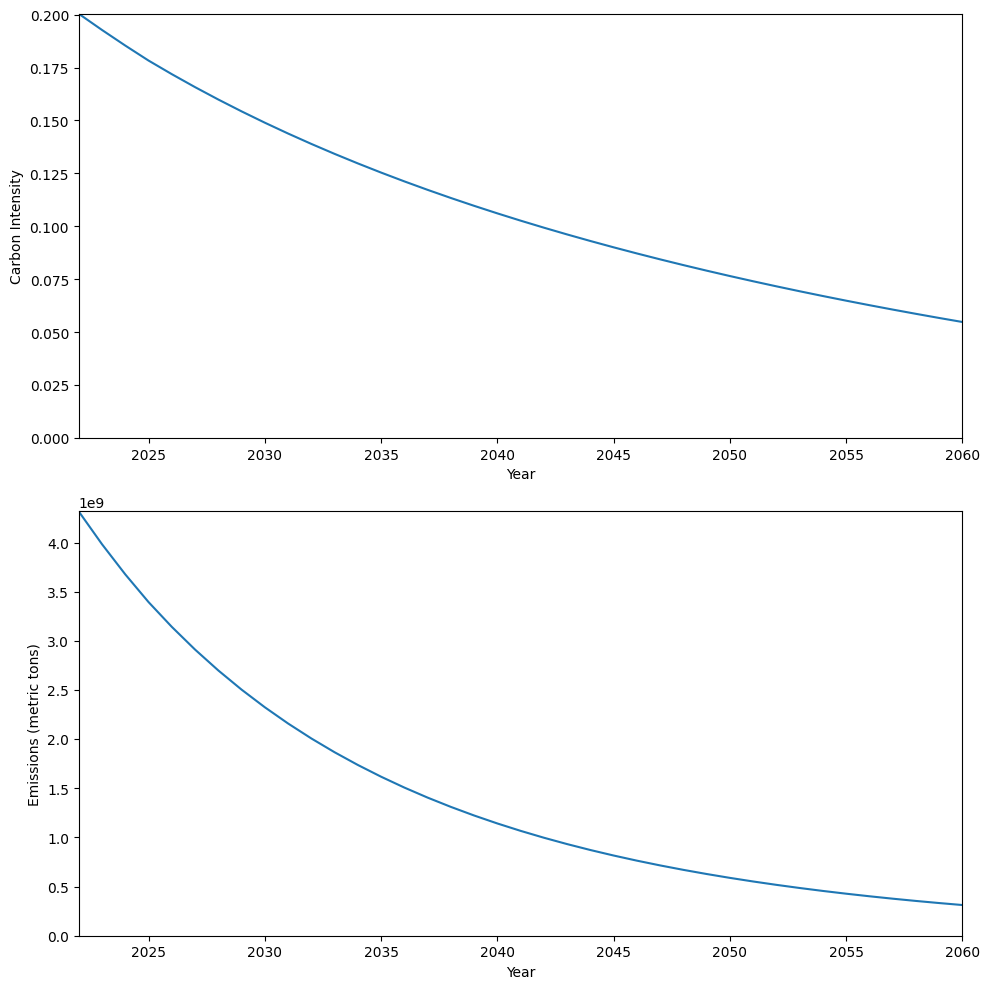

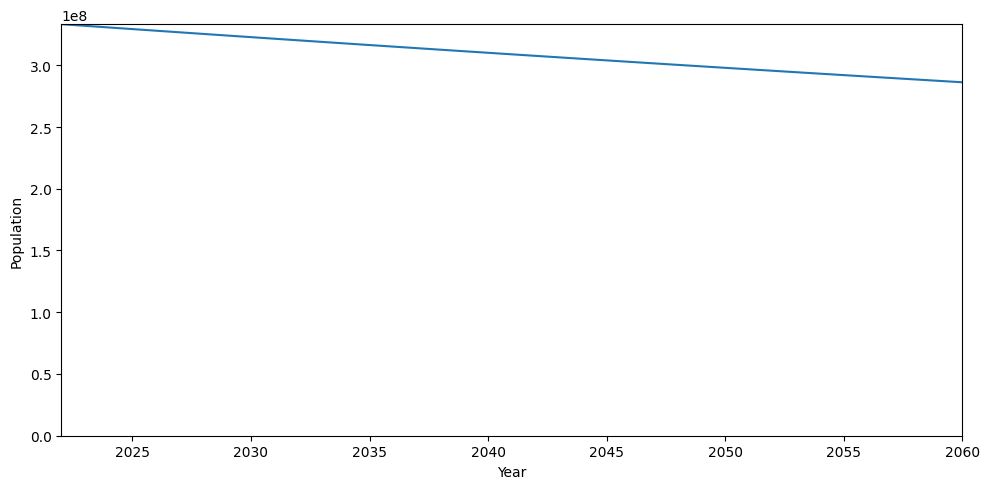

In [18]:
test_country = "United States"
plotting_1.plot_country_economy(test_country)
plotting_1.plot_country_emissions(test_country)
plotting_1.plot_country_population(test_country)

In [19]:
# run a scenario print country specific carbon budgets
#scenario_params = {"end_year": 2060,
             #      "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
              #     "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
              #     "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
              #     "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
              #     "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
              #     "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
              #     "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
              #     "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
              #     "k": 0.05,
              #     "t0": 2060,
              #     "final_improvement_rate": -0.05
            
           # }

#scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
#scenario_1.compute_country_scenario_params()
#print(scenario_1.compute_average_global_growth_rate())
#scenario_1.run()

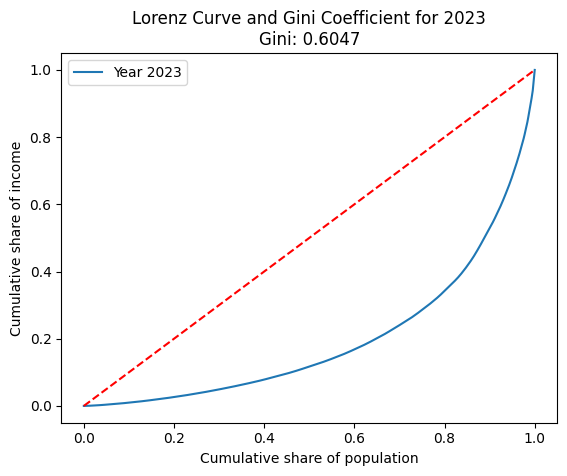

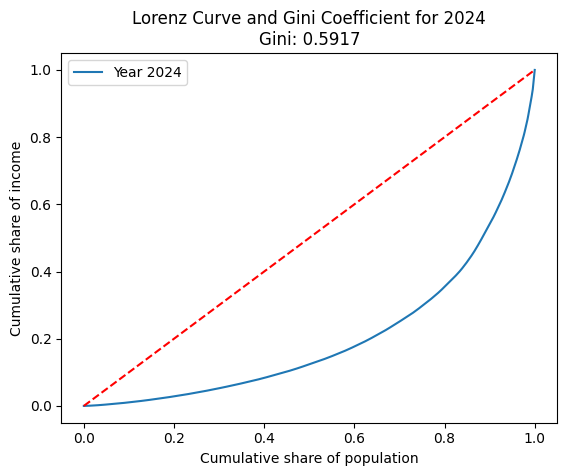

In [20]:
## check whether global population and income vector for gini coefficient and lorenz curve are proper 
# save scenario_1.gini_data dictionary to a csv file
gini_data = pd.DataFrame(scenario_1.gini_data)
gini_data.to_csv(".\gini_data.csv")
# read out the columns population and income from gini data and plot each values as lorenz curve
#subset for every year in gini_data years column the value in population and income column
# loop ovre the years
for year in gini_data["years"]:
    # Get the population data for the year
    population_data = list(gini_data.loc[gini_data["years"] == year, "population"].iloc[0])
    # Get the income data for the year
    income_data = list(gini_data.loc[gini_data["years"] == year, "income"].iloc[0])

    # compute the total income_data as well by multiplying the income_data with the population_data
    total_income = [population_data[i]*income_data[i] for i in range(len(population_data))]

    # compute the cumulative total income share and the cumulative population share
    cumulative_income_share = [sum(total_income[:i])/sum(total_income) for i in range(len(total_income)+1)]

    cumulative_population_share = [sum(population_data[:i])/sum(population_data) for i in range(len(population_data)+1)]

    # Compute the Gini coefficient
    # The area under the Lorenz curve can be computed as the sum of the areas of the trapezoids under it
    area_under_lorenz_curve = sum((cumulative_population_share[i+1] - cumulative_population_share[i]) * 
                                  (cumulative_income_share[i+1] + cumulative_income_share[i]) / 2 
                                  for i in range(len(cumulative_population_share)-1))
    gini_coefficient = 1 - 2 * area_under_lorenz_curve

    # Plot the Lorenz curve
    plt.plot(cumulative_population_share, cumulative_income_share, label=f'Year {year}')
    plt.plot([0, 1], [0, 1], 'r--')  # Line of perfect equality
    plt.xlabel('Cumulative share of population')
    plt.ylabel('Cumulative share of income')
    plt.title(f'Lorenz Curve and Gini Coefficient for {year}\nGini: {gini_coefficient:.4f}')
    plt.legend()
    plt.show()

    if year == 2024:
        break
 

Text(0, 0.5, 'Number of countries')

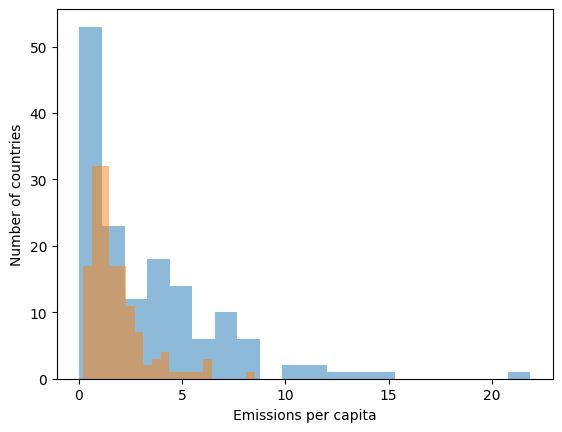

In [21]:
# plot all the emissions per capita in countries at the end of the simulation
beginning_distribution_values =[]
end_distribution_values = []
for country in scenario_1.countries.values():
    beginning_distribution_values.append(country.carbon_emissions_pc_trajectory[2022])
    end_distribution_values.append(country.carbon_emissions_pc_trajectory[scenario_1.end_year])

# plot the beginning and end distribution of emissions per capita
fig, ax = plt.subplots()
ax.hist(beginning_distribution_values, bins=20, alpha=0.5, label='2022')
ax.hist(end_distribution_values, bins=20, alpha=0.5, label='2100')
ax.set_xlabel('Emissions per capita')
ax.set_ylabel('Number of countries')

Text(0, 0.5, 'Emissions per capita in tonnes')

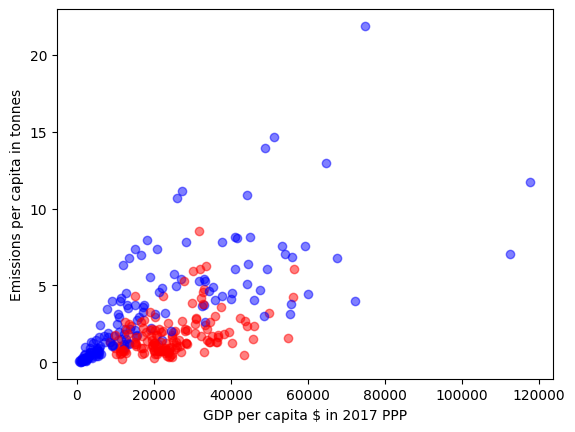

In [22]:
# also plot beginning and end scatter of emissions per capita vs. gdp per capita
fig, ax = plt.subplots()
for country in scenario_1.countries.values():
    ax.scatter(country.gdppc_trajectory[2022], country.carbon_emissions_pc_trajectory[2022], color = 'blue', alpha=0.5)
    ax.scatter(country.gdppc_trajectory[scenario_1.end_year], country.carbon_emissions_pc_trajectory[scenario_1.end_year], color = 'red', alpha=0.5)
    
# name x axis
ax.set_xlabel('GDP per capita $ in 2017 PPP')
# name y axis
ax.set_ylabel('Emissions per capita in tonnes')
# fit a linear fit to the two different data sets directly in the scatter plot
# first do it for the beginning

# Analyze national gini coefficients

In [23]:
print(scenario_1.countries['United States'].decile_trajectories)

{'decile1': {2023: 7230.216821430296, 2024: 7293.870398487509, 2025: 7358.084370616163, 2026: 7422.863671437441, 2027: 7488.21327800727, 2028: 7554.138211198719, 2029: 7620.643536087752, 2030: 7687.734362342387, 2031: 7755.415844615271, 2032: 7823.693182939725, 2033: 7892.571623129259, 2034: 7962.056457180619, 2035: 8032.153023680373, 2036: 8102.866708215081, 2037: 8174.202943785077, 2038: 8246.167211221886, 2039: 8318.765039609325, 2040: 8392.002006708311, 2041: 8465.8837393854, 2042: 8540.415914045105, 2043: 8615.604257066025, 2044: 8691.454545240802, 2045: 8767.972606219962, 2046: 8845.164318959658, 2047: 8923.035614173352, 2048: 9001.592474787483, 2049: 9080.840936401137, 2050: 9160.787087749772, 2051: 9241.437071173015, 2052: 9322.79708308659, 2053: 9404.873374458393, 2054: 9487.672251288755, 2055: 9571.200075094946, 2056: 9655.463263399934, 2057: 9740.46829022544, 2058: 9826.221686589362, 2059: 9912.730041007542, 2060: 9999.999999999976}, 'decile2': {2023: 12120.307785143463, 202

In [24]:
# create an empty dataframe in pandas with five columns country, decile, year, scenario, consumption_exp
scenario_full_data = pd.DataFrame(columns=['scenario', 'country', 'decile', 'year', 'consumption_exp'])
scenario_gini_data = pd.DataFrame(columns=['scenario', 'country', 'year', 'gini'])


# make function to add n-element list to dataframe

def add_list_to_dataframe(df, elements):
    # Validate the input
    #print(len(elements))
    #print(len(df.columns))
    if len(elements) != len(df.columns):
        raise ValueError("The number of elements must be exactly equal to the number of columns.")
    
    # Create a DataFrame from the list and append it to the existing DataFrame
    new_df = pd.DataFrame([elements], columns=df.columns)
    df = pd.concat([df, new_df], ignore_index=True)
    
    return df

In [25]:
# loop over the countries and add each country with the concat() method to the dataframe
i = 0
scenario_id = str(scenario_1.income_goal) + '_' + str(scenario_1.end_year)
for country in scenario_1.countries.values():
    i += 1
    for decile, years in country.decile_trajectories.items():
        for year, value in years.items():
            countryvalues = [] # create empty list for current country values
            countryvalues.append(scenario_id) # add scenario_id to the list
            countryvalues.append(country.code) # add country code to the list
            countryvalues.append(decile)
            #print(year)
            countryvalues.append(year)
            #print(value)
            countryvalues.append(value)
            scenario_full_data = add_list_to_dataframe(scenario_full_data, countryvalues)
    if i == 2:
         break


    






C:\Users\yoswald\AppData\Local\Temp\ipykernel_24736\3909973554.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


In [26]:
# loop over the countries and add each country with the concat() method to the dataframe
i = 0
scenario_id = str(scenario_1.income_goal) + '_' + str(scenario_1.end_year)
for country in scenario_1.countries.values():
    i += 1
    for value, years in country.gini_coefficient_trajectory.items():
            countryvalues2 = [] # create empty list for current country values
            countryvalues2.append(scenario_id) # add scenario_id to the list
            countryvalues2.append(country.code) # add country code to the list
            countryvalues2.append(years)
            countryvalues2.append(value)   
            scenario_gini_data = add_list_to_dataframe(scenario_gini_data, countryvalues2)
    if i == 2:
         break


C:\Users\yoswald\AppData\Local\Temp\ipykernel_24736\3909973554.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)
